In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('ohlc.csv')
df.head()

,Date,Open,High,Low,Close
0,2024/1/3,268,313,250,297
1,2024/1/4,298,344,289,314
2,2024/1/5,298,316,274,288
3,2024/1/8,294,295,231,250
4,2024/1/9,241,267,226,252


In [58]:
type(df.iloc[i,4])

numpy.int64

In [59]:
# create new column vectors for categories
df['rising'] = 0
df['falling'] = 0
df['stable'] = 0

# create new column for price changes
df['price_change'] = 0
for i in range(1,np.shape(df)[0]):
    df.loc[i,'price_change'] = ((df.iloc[i,4] - df.iloc[i-1,4]) / df.iloc[i-1,4]) * 100

df.describe()

,Open,High,Low,Close,rising,falling,stable,price_change
count,124.000000,124.000000,124.000000,124.000000,124.0,124.0,124.0,124.000000
mean,165.427419,178.516129,147.403226,165.838710,0.0,0.0,0.0,-0.597611
std,58.140029,63.462105,53.318177,57.209412,0.0,0.0,0.0,6.651130
min,90.000000,109.000000,90.000000,100.000000,0.0,0.0,0.0,-19.444444
25%,112.750000,120.500000,97.750000,114.750000,0.0,0.0,0.0,-5.023982
50%,143.500000,151.000000,124.000000,141.500000,0.0,0.0,0.0,-0.651738
75%,211.000000,221.000000,184.000000,204.250000,0.0,0.0,0.0,3.818681
max,298.000000,344.000000,289.000000,314.000000,0.0,0.0,0.0,16.826923


In [60]:
# define a fluctuation percentage
fluc_percentage = 0

# loop for seaching the appropriate percentage value
for x in np.arange(2.5,3.5,0.05):
    fluc_percentage = x
    rising_count = falling_count = stable_count = 0
    for i in range(0,np.shape(df)[0]):
        if df.loc[i,'price_change'] > x:
            rising_count+=1
        elif df.loc[i,'price_change'] < -x:
            falling_count+=1
        else:
            stable_count+=1
    total_count = rising_count+falling_count+stable_count
    rising_percentage = (rising_count / total_count) * 100
    falling_percentage = (falling_count / total_count) * 100
    stable_percentage = (stable_count / total_count) * 100
    
    print('fluc percentage is:\n', fluc_percentage)
    print(f"Percentage of rising: {rising_percentage:.2f}%")
    print(f"Percentage of falling: {falling_percentage:.2f}%")
    print(f"Percentage of stable: {stable_percentage:.2f}%")

fluc percentage is:
 2.5
Percentage of rising: 33.06%
Percentage of falling: 39.52%
Percentage of stable: 27.42%
fluc percentage is:
 2.55
Percentage of rising: 33.06%
Percentage of falling: 39.52%
Percentage of stable: 27.42%
fluc percentage is:
 2.5999999999999996
Percentage of rising: 33.06%
Percentage of falling: 38.71%
Percentage of stable: 28.23%
fluc percentage is:
 2.6499999999999995
Percentage of rising: 33.06%
Percentage of falling: 38.71%
Percentage of stable: 28.23%
fluc percentage is:
 2.6999999999999993
Percentage of rising: 33.06%
Percentage of falling: 37.90%
Percentage of stable: 29.03%
fluc percentage is:
 2.749999999999999
Percentage of rising: 33.06%
Percentage of falling: 37.90%
Percentage of stable: 29.03%
fluc percentage is:
 2.799999999999999
Percentage of rising: 33.06%
Percentage of falling: 37.90%
Percentage of stable: 29.03%
fluc percentage is:
 2.8499999999999988
Percentage of rising: 32.26%
Percentage of falling: 37.90%
Percentage of stable: 29.84%
fluc pe

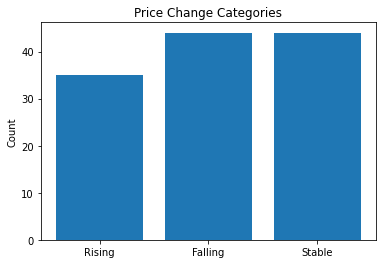

In [61]:
# Choose the x value that makes the three categories most evenly distributed
fluc_percentage = 3

for i in range(0,np.shape(df)[0]):
    if df.loc[i,'price_change'] > fluc_percentage:
        df.loc[i,'rising'] = 1
    elif df.loc[i,'price_change'] < -fluc_percentage:
        df.loc[i,'falling'] = 1
    else:
        df.loc[i,'stable'] = 1

# drop the first row
df = df.drop(0)
        
# count the number of 3 classes
rising_count = df['rising'].sum()
falling_count = df['falling'].sum()
stable_count = df['stable'].sum()

# plot a bar chart
fig, ax = plt.subplots()
ax.bar(['Rising', 'Falling', 'Stable'], [rising_count, falling_count, stable_count])
ax.set_ylabel('Count')
ax.set_title('Price Change Categories')
plt.show()

In [62]:
df

,Date,Open,High,Low,Close,rising,falling,stable,price_change
1,2024/1/4,298,344,289,314,1,0,0,5.723906
2,2024/1/5,298,316,274,288,0,1,0,-8.280255
3,2024/1/8,294,295,231,250,0,1,0,-13.194444
4,2024/1/9,241,267,226,252,0,0,1,0.800000
5,2024/1/10,247,290,237,277,1,0,0,9.920635
...,...,...,...,...,...,...,...,...,...
119,2024/6/24,90,109,90,108,0,0,1,0.934579
120,2024/6/25,105,110,90,103,0,1,0,-4.629630
121,2024/6/26,105,110,90,106,0,0,1,2.912621
122,2024/6/27,102,109,90,107,0,0,1,0.943396


In [63]:
# save as a new csv
df.to_csv('ohlc_trend.csv', index=False)